In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [ ]:
df=pd.read_csv("/content/naval_propulsion_plant.csv")

In [ ]:
df.head()

,lever_position,ship_speed,gas_turbine_shaft_torque,gas_turbine_rate_of_revolutions,gas_generator_rate_of_revolutions,starboard_propeller_torque,port_propeller_torque,hp_turbine_exit_temperature,gt_compressor_outlet_air_temperature,hp_turbine_exit_pressure,gt_compressor_outlet_air_pressure,gas_turbine_exhaust_gas_pressure,turbine_injecton_control,fuel_flow,gt_compressor_decay_state_coefficient,gt_turbine_decay_state_coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   lever_position                         11934 non-null  float64
 1   ship_speed                             11934 non-null  float64
 2   gas_turbine_shaft_torque               11934 non-null  float64
 3   gas_turbine_rate_of_revolutions        11934 non-null  float64
 4   gas_generator_rate_of_revolutions      11934 non-null  float64
 5   starboard_propeller_torque             11934 non-null  float64
 6   port_propeller_torque                  11934 non-null  float64
 7   hp_turbine_exit_temperature            11934 non-null  float64
 8   gt_compressor_outlet_air_temperature   11934 non-null  float64
 9   hp_turbine_exit_pressure               11934 non-null  float64
 10  gt_compressor_outlet_air_pressure      11934 non-null  float64
 11  ga

In [ ]:
df.dtypes

lever_position                           float64
ship_speed                               float64
gas_turbine_shaft_torque                 float64
gas_turbine_rate_of_revolutions          float64
gas_generator_rate_of_revolutions        float64
starboard_propeller_torque               float64
port_propeller_torque                    float64
hp_turbine_exit_temperature              float64
gt_compressor_outlet_air_temperature     float64
hp_turbine_exit_pressure                 float64
gt_compressor_outlet_air_pressure        float64
gas_turbine_exhaust_gas_pressure         float64
turbine_injecton_control                 float64
fuel_flow                                float64
gt_compressor_decay_state_coefficient    float64
gt_turbine_decay_state_coefficient       float64
dtype: object

In [ ]:
df.describe()

,lever_position,ship_speed,gas_turbine_shaft_torque,gas_turbine_rate_of_revolutions,gas_generator_rate_of_revolutions,starboard_propeller_torque,port_propeller_torque,hp_turbine_exit_temperature,gt_compressor_outlet_air_temperature,hp_turbine_exit_pressure,gt_compressor_outlet_air_pressure,gas_turbine_exhaust_gas_pressure,turbine_injecton_control,fuel_flow,gt_compressor_decay_state_coefficient,gt_turbine_decay_state_coefficient
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,646.215331,2.352963,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,72.675882,1.084770,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,540.442000,1.093000,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,578.092250,1.389000,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,637.141500,2.083000,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,693.924500,2.981000,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,789.094000,4.560000,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [ ]:
df.corr()

,lever_position,ship_speed,gas_turbine_shaft_torque,gas_turbine_rate_of_revolutions,gas_generator_rate_of_revolutions,starboard_propeller_torque,port_propeller_torque,hp_turbine_exit_temperature,gt_compressor_outlet_air_temperature,hp_turbine_exit_pressure,gt_compressor_outlet_air_pressure,gas_turbine_exhaust_gas_pressure,turbine_injecton_control,fuel_flow,gt_compressor_decay_state_coefficient,gt_turbine_decay_state_coefficient
lever_position,1.000000e+00,9.999152e-01,0.961025,0.962090,0.986017,0.959241,0.959241,0.961242,0.982748,0.963058,0.969113,0.953361,0.913631,0.931422,2.264405e-15,8.566427e-17
ship_speed,9.999152e-01,1.000000e+00,0.958243,0.960412,0.986621,0.956371,0.956371,0.958841,0.981161,0.960613,0.966975,0.950813,0.910014,0.927815,6.346298e-16,9.367920e-18
gas_turbine_shaft_torque,9.610254e-01,9.582428e-01,1.000000,0.989723,0.932993,0.999177,0.999177,0.991130,0.990227,0.998900,0.997582,0.996046,0.977871,0.995082,2.978258e-03,3.576383e-04
gas_turbine_rate_of_revolutions,9.620898e-01,9.604117e-01,0.989723,1.000000,0.943038,0.988625,0.988625,0.979638,0.989278,0.995103,0.996035,0.994019,0.962341,0.980223,1.369908e-03,-1.776556e-05
gas_generator_rate_of_revolutions,9.860173e-01,9.866210e-01,0.932993,0.943038,1.000000,0.929593,0.929593,0.939762,0.966659,0.937460,0.945938,0.924231,0.879120,0.896959,-1.883800e-02,1.000011e-02
starboard_propeller_torque,9.592410e-01,9.563708e-01,0.999177,0.988625,0.929593,1.000000,1.000000,0.985962,0.987369,0.998012,0.996172,0.996238,0.977468,0.994366,7.535000e-04,1.044235e-04
port_propeller_torque,9.592410e-01,9.563708e-01,0.999177,0.988625,0.929593,1.000000,1.000000,0.985962,0.987369,0.998012,0.996172,0.996238,0.977468,0.994366,7.535000e-04,1.044235e-04
hp_turbine_exit_temperature,9.612418e-01,9.588406e-01,0.991130,0.979638,0.939762,0.985962,0.985962,1.000000,0.992308,0.989383,0.990463,0.980071,0.969655,0.986318,-3.962512e-02,-3.846390e-02
gt_compressor_outlet_air_temperature,9.827476e-01,9.811609e-01,0.990227,0.989278,0.966659,0.987369,0.987369,0.992308,1.000000,0.991704,0.994373,0.983461,0.958711,0.976453,-4.717657e-02,-1.685505e-02
hp_turbine_exit_pressure,9.630581e-01,9.606126e-01,0.998900,0.995103,0.937460,0.998012,0.998012,0.989383,0.991704,1.000000,0.999401,0.997941,0.975704,0.992728,8.167586e-03,-2.718186e-03


In [ ]:
df.shape

(11934, 16)

<Axes: >

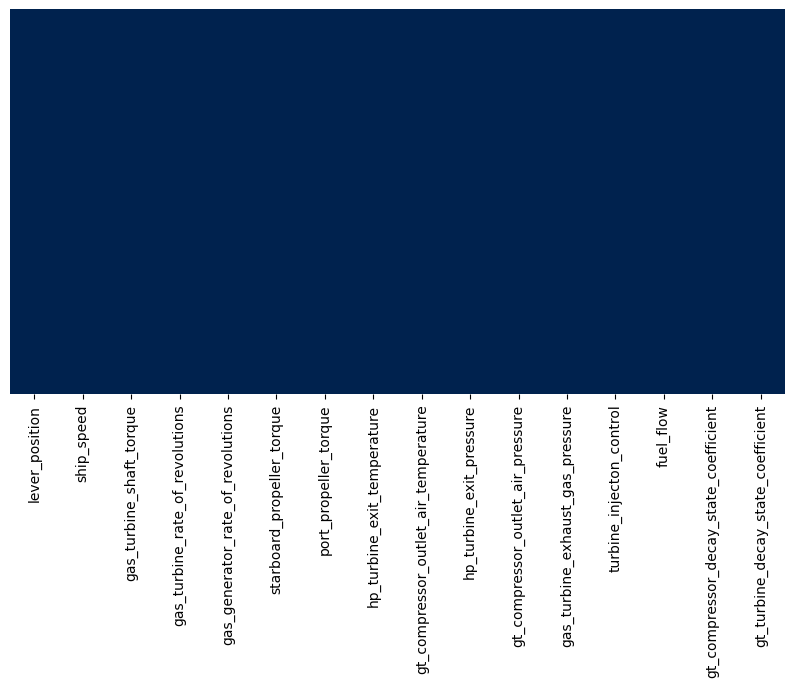

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="cividis")

In [ ]:
# Rename multiple columns
df.rename(columns={'gas_turbine_shaft_torque': 'tur.shaft.torq'}, inplace=True)
df.rename(columns={'gas_turbine_rate_of_revolutions': 'tur_rt_rev', 'gas_generator_rate_of_revolutions': 'gas_gen_rt_rev'}, inplace=True)
df.rename(columns={'hp_turbine_exit_temperature': 'hp_tq_ex_temp', 'gt_compressor_outlet_ar_temperature': 'gt_comp_air_temp'}, inplace=True)
df.rename(columns={'gas_turbine_shaft_torque': 'tur.shaft.torq', 'Another_Column': 'Yet_Another_Column'}, inplace=True)
df.rename(columns={'gas_turbine_shaft_torque': 'tur.shaft.torq', 'Another_Column': 'Yet_Another_Column'}, inplace=True)

In [ ]:
df.head()

,lever_position,ship_speed,tur.shaft.torq,tur_rt_rev,gas_gen_rt_rev,starboard_propeller_torque,port_propeller_torque,hp_tq_ex_temp,gt_compressor_outlet_air_temperature,hp_turbine_exit_pressure,gt_compressor_outlet_air_pressure,gas_turbine_exhaust_gas_pressure,turbine_injecton_control,fuel_flow,gt_compressor_decay_state_coefficient,gt_turbine_decay_state_coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
df.drop(["gt_turbine_decay_state_coefficient","gt_turbine_decay_state_coefficient"],axis=1,inplace=True)

In [ ]:
df.shape

(11934, 15)

In [ ]:
df.head()

,lever_position,ship_speed,tur.shaft.torq,tur_rt_rev,gas_gen_rt_rev,starboard_propeller_torque,port_propeller_torque,hp_tq_ex_temp,gt_compressor_outlet_air_temperature,hp_turbine_exit_pressure,gt_compressor_outlet_air_pressure,gas_turbine_exhaust_gas_pressure,turbine_injecton_control,fuel_flow,gt_compressor_decay_state_coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95


In [ ]:
df.rename(columns={'starboard_propeller_torque': 'std_pl_trq', 'port_prl_trq': 'gas_gen_rt_rev',"gt_compressor_outlet_air_pressure":"gt_comp_air_pr","gt_compressor_decay_state_coefficient":"gt_comp_dec_coff","turbine_injecton_control":"trb_inj_cont","gt_compressor_outlet_air_temperature":"gt_comp_air_temp","gt_compressor_outlet_air_pressure":"gt_comp_out_pr"}, inplace=True)

In [ ]:
df.head()

,lever_position,ship_speed,tur.shaft.torq,tur_rt_rev,gas_gen_rt_rev,std_pl_trq,port_propeller_torque,hp_tq_ex_temp,gt_comp_air_temp,hp_turbine_exit_pressure,gt_comp_out_pr,gas_turbine_exhaust_gas_pressure,trb_inj_cont,fuel_flow,gt_comp_dec_coff
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95


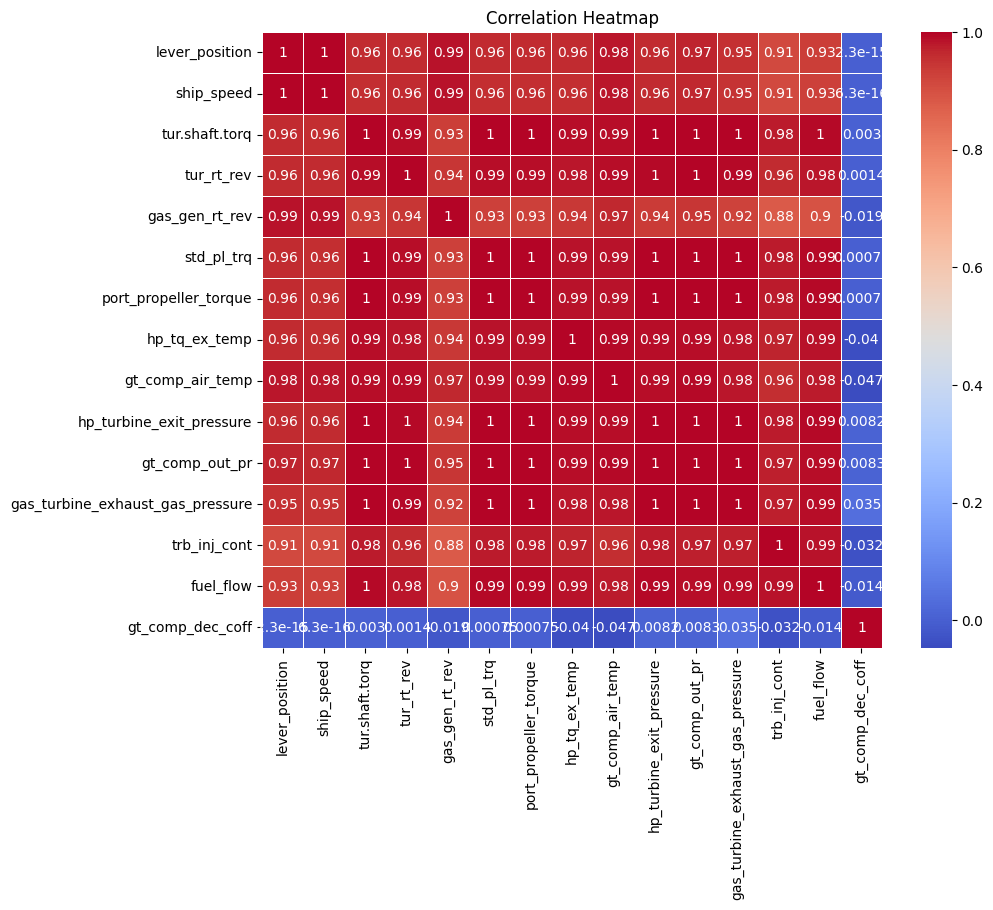

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


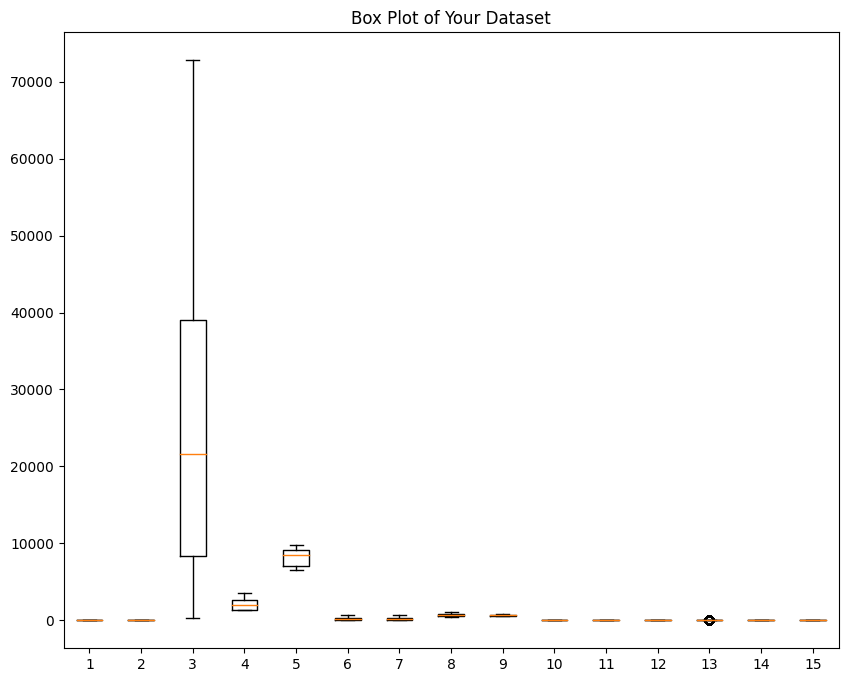

In [ ]:
plt.figure(figsize=(10, 8))
plt.boxplot(df)
plt.title('Box Plot of Your Dataset')
plt.show()



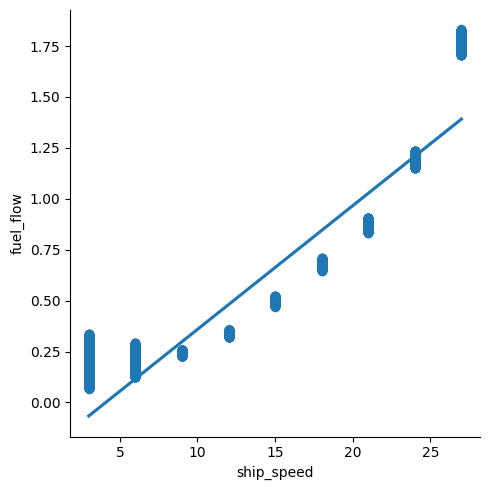

In [ ]:
sns.lmplot(x="ship_speed",y="fuel_flow", data=df)
plt.show()

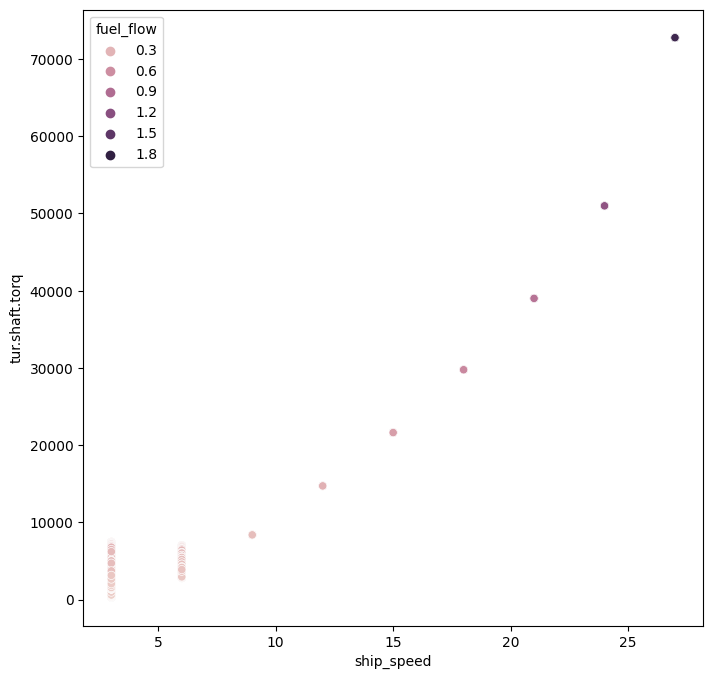

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="ship_speed",y="tur.shaft.torq",hue="fuel_flow",data=df)
plt.show()

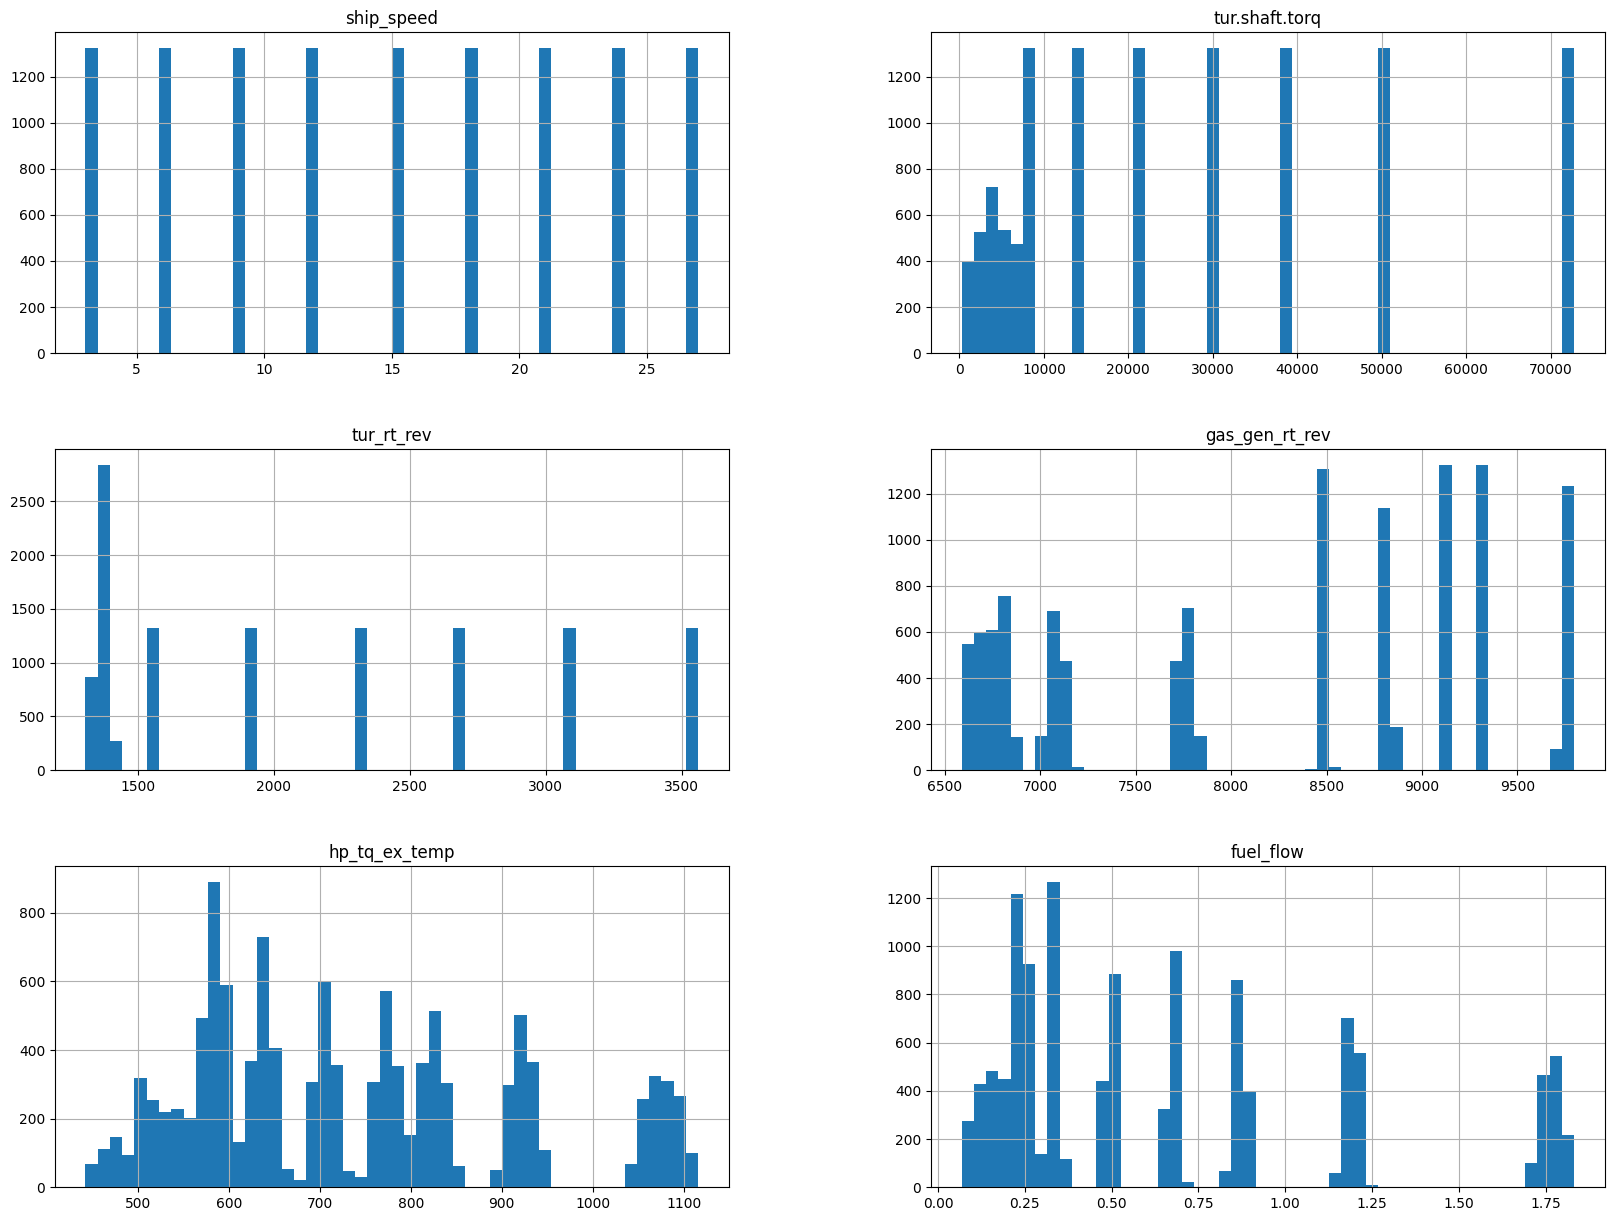

In [ ]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
df.dtypes

lever_position                      float64
ship_speed                          float64
tur.shaft.torq                      float64
tur_rt_rev                          float64
gas_gen_rt_rev                      float64
std_pl_trq                          float64
port_propeller_torque               float64
hp_tq_ex_temp                       float64
gt_comp_air_temp                    float64
hp_turbine_exit_pressure            float64
gt_comp_out_pr                      float64
gas_turbine_exhaust_gas_pressure    float64
trb_inj_cont                        float64
fuel_flow                           float64
gt_comp_dec_coff                    float64
dtype: object

In [ ]:
df.isnull().sum()

lever_position                      0
ship_speed                          0
tur.shaft.torq                      0
tur_rt_rev                          0
gas_gen_rt_rev                      0
std_pl_trq                          0
port_propeller_torque               0
hp_tq_ex_temp                       0
gt_comp_air_temp                    0
hp_turbine_exit_pressure            0
gt_comp_out_pr                      0
gas_turbine_exhaust_gas_pressure    0
trb_inj_cont                        0
fuel_flow                           0
gt_comp_dec_coff                    0
dtype: int64